In [1]:
from utils import load_model_and_tokenizer, update_model_with_mask_token

update_model_with_mask_token()

model, tokenizer = load_model_and_tokenizer()

# analyze_tokenizer(tokenizer)

Loading tokenizer...
Found 2865 musical tokens out of 53078 total
No new musical tokens to add (they may already exist in vocabulary)
<MASK> token already exists in vocabulary
Loading base model with correct vocab size...


The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Loading LoRA adapters...
Saving updated model...
Update complete!
Found 2865 musical tokens out of 53078 total


In [2]:
from filter import is_musical_token

# Add this test before training
test_text = "C4_q D4_e Rest_h G5_1.0 Piano:"
tokens = tokenizer.tokenize(test_text)
print("Tokenization test:", tokens)
musical_tokens = [token for token in tokens if is_musical_token(token)]
print("Musical tokens found:", musical_tokens)

Tokenization test: ['C4_q', 'Ġ', 'D4_e', 'Ġ', 'Rest_h', 'Ġ', 'G5_1.0', 'ĠPiano', ':']
Musical tokens found: ['C4_q', 'D4_e', 'Rest_h', 'G5_1.0']


In [3]:
from prepare_dataset import pre_tokenize_musical_text
from filter import is_musical_token

text = "C4_q D4_e Rest_h G5_1.0 Piano:"
pre_tokenized = pre_tokenize_musical_text(text)
print("Fixed pre-tokenized:", repr(pre_tokenized))
# Should output: "C4_q D4_e Rest_h G5_1.0 Piano:"

tokens = tokenizer.tokenize(pre_tokenized)
print("Fixed tokens:", tokens)
# Should be cleaner: ['C4_q', 'Ġ', 'D4_e', 'Ġ', 'Rest_h', 'Ġ', 'G5_1.0', 'Ġ', 'Piano:']

# Filter out space tokens for musical token detection
musical_tokens = [token for token in tokens if is_musical_token(token) and token != 'Ġ']
print("Clean musical tokens:", musical_tokens)
# Should be: ['C4_q', 'D4_e', 'Rest_h', 'G5_1.0', 'Piano:']

Fixed pre-tokenized: 'C4_q D4_e Rest_h G5_1.0 Piano:'
Fixed tokens: ['C4_q', 'Ġ', 'D4_e', 'Ġ', 'Rest_h', 'Ġ', 'G5_1.0', 'ĠPiano', ':']
Clean musical tokens: ['C4_q', 'D4_e', 'Rest_h', 'G5_1.0']



---

## RETRAIN

---

In [ ]:
from retrain import train_lora
from utils import load_model_and_tokenizer

model, tokenizer = load_model_and_tokenizer(for_training = True)
metrics_history = train_lora(model, tokenizer)

Found 2832 musical tokens out of 53078 total
Trainable params: 2,162,688 / 359,874,560 (0.60%)


Tokenizing pre-tokenized dataset:   0%|          | 0/435 [00:00<?, ? examples/s]

Tokenizing pre-tokenized dataset:   0%|          | 0/37 [00:00<?, ? examples/s]

Found 21 rest tokens in musical vocabulary


Epoch 1/5 [Train]:   0%|          | 0/218 [00:00<?, ?it/s]

`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


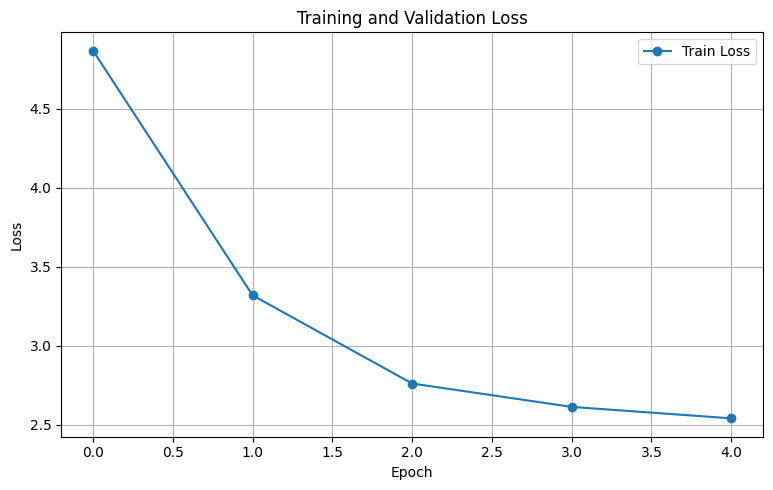

In [2]:
from retrain import plot_metrics

plot_metrics(metrics_history)